In [ ]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

'''
huml - длина плечевой кости
humw - диаметр плечевой кости
ulnal - длина локтевой кости
ulnaw - диаметр локтевой кости
feml - длина бедренной кости
femw - диаметр бедренной кости
tibl - длина кости между бедром и цевкой в ноге
tibw - диаметр кости между бедром и цевкой в ноге
tarl - длина цевки;одна из костей ноги птиц, расположенная между голенью и пальцами
tarw - диаметр цевки

Перед нами стоит задача классификации, необходимо исследовать взаимосвязь между
размерами костей и экологических групп птиц и распознать экологическую группу по форме костей.

Экологические группы:

-Swimming birds (Водоплавающие птицы)

-Wading birds (Болотные птицы)

-Terrestrial birds (Наземные птицы)

-Raptors (Хищники)

-Scansorial birds (Птицы приспособленные к лазанью)

-Singing birds (Поющие птицы)

SW: Swimming Birds
W: Wading Birds
T: Terrestrial Birds
R: Raptors
P: Scansorial Birds
SO: Singing Birds

'''
pass

In [ ]:
data = pd.read_csv('bird.csv')
data.head()

In [ ]:
'Возвращает размерность файла'
pass
data.shape

In [ ]:
'''
Описательная статистика: мат. ожидание, дисперсия, max, min
Исключает значение NaN
'''
pass
data.describe()

In [ ]:
'Диаграмма рассеяния - коррелированность данных'
pd.plotting.scatter_matrix(data)

In [ ]:
'Колонки с не численными признаками'
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
print (categorical_columns)

In [ ]:
'Названия столбцов с численными значениями'
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(numerical_columns)

In [ ]:
'Средние значения'
data.median(axis=0)

In [ ]:
'Количество значений в столбце, содержащим численные данные'
data[numerical_columns].count(axis = 0)

In [ ]:
'Количество значений в столбце, содержащим категориальные данные'
data[categorical_columns].count(axis = 0)

In [ ]:
'''
Убираем пропущенные значения
'''
data = data.fillna(data.median(axis = 0), axis = 0)

In [ ]:
data[numerical_columns].count(axis = 0)

In [ ]:
data[categorical_columns].count(axis = 0)

In [ ]:
'Не бинарные столбцы в нашем случае равны категориальным'
data_nonbinary = pd.get_dummies(data[categorical_columns])
print(data_nonbinary.columns)

In [ ]:
'Нормализуем наши данные, если они масштабированы'

data_numerical = data[numerical_columns]
data_numerical.describe()

In [ ]:
'Размерность результирующей таблицы'
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)

In [ ]:
data

In [ ]:
X = data.drop((['id','type_P','type_R','type_SO','type_SW','type_T','type_W']), axis = 1) # выбрасываем столбец
Y = data[['type_P','type_R','type_SO','type_SW','type_T','type_W']]
feature_names = X.columns

In [ ]:
X.columns

In [ ]:
Y.columns

In [ ]:
print(X.shape)
print(Y.shape)
N, d = X.shape

In [ ]:
type(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

In [ ]:
294+126

In [ ]:
'''Метод k ближайших соседей'''
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,Y_train)

In [ ]:
Y_train_predict = knn.predict(X_train)
Y_test_predict = knn.predict(X_test)

err_train = np.mean(Y_train != Y_train_predict)
err_test  = np.mean(Y_test  != Y_test_predict)

#Err_test - ошибка 

print(err_train, err_test)

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_P'], Y_test_predict[:,0]))

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_R'], Y_test_predict[:,1]))

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_SO'], Y_test_predict[:,2]))

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_SW'], Y_test_predict[:,3]))

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_T'], Y_test_predict[:,4]))

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_W'], Y_test_predict[:,5]))

In [ ]:
#Подбор параметров
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

#Очень странно, ошибка нулевая получается. Слишком великолепные данные???

In [ ]:
#Random forest
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, Y_train)

err_train = np.mean(Y_train != rf.predict(X_train))
err_test  = np.mean(Y_test  != rf.predict(X_test))

print(err_train, err_test)

In [ ]:
#Значимость признаков
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

In [ ]:
feature_names[[1,0,1]]

In [ ]:
d_first = 10
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

In [ ]:
#Extremely Randomized Trees
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, Y_train)

err_train = np.mean(Y_train != ert.predict(X_train))
err_test  = np.mean(Y_test  != ert.predict(X_test))

print(err_train, err_test)

<BR><big><strong>Домашняя работа №2</strong></big></BR>

In [ ]:
X = data.drop((['id','type_P','type_R','type_SO','type_SW','type_T','type_W']), axis = 1) # выбрасываем столбец
Y = data[['type_SW']]

<br>Мы построим НС для предсказания Swimming birds (Водоплавающие птицы)</br>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
N_test, _ = X_test.shape

In [ ]:
from sklearn.neural_network import MLPClassifier

<br>Для начала мы проанализируем как параметр регуляризации влияет на ошибку. Для этого мы рассмотрим однослойную и двухслойную НС со скрытыми полями, причём если это двухслойная сеть,в каждом поле одинаковое количество нейронов. <br>

In [ ]:
alpha_arr = np.logspace(-3, 2, 20)
neuron_arr = [(100),(200),(20,20),(500),(50,50),(100,100)]
i = 1
min_error = []
alpha_opt = []
for neuron in neuron_arr:
    test_err = []
    train_err = []
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = neuron, 
                                  solver = 'lbfgs', activation = 'logistic')
        mlp_model.fit(X_train, Y_train)

        Y_train_pred = mlp_model.predict(X_train)
        Y_test_pred = mlp_model.predict(X_test)
        train_err.append(np.mean(Y_train.values.ravel() != Y_train_pred))
        test_err.append(np.mean(Y_test.values.ravel() != Y_test_pred))
        
    erob = u'Error on train = ' + str(round(np.mean(Y_train.values.ravel() != Y_train_pred),5))
    ertr = u'  on test = ' + str(round(np.mean(Y_test.values.ravel() != Y_test_pred),5))
    

    min_error.append(np.min(test_err))
    alpha_opt.append(alpha_arr[test_err == np.min(test_err)])
    
    plt.figure(i)    
    plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
    plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
    plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
    plt.title('Error vs. alpha' + '     neurons = ' + str(neuron))
    plt.xlabel('alpha')
    plt.ylabel('error')
    plt.suptitle(erob + ertr)
    plt.legend()
    i = i + 1
    pass

<BR>Минимальная ошибка</BR>

In [ ]:
print(alpha_opt[np.argmin(min_error)])
print(np.min(min_error))

<BR>Оптимальное альфа равно 2.6366509 на однослойной НС с 500 нейронами</BR>

<br>Теперь исследуем как количество нейронов влияет на ошибку и переобучение</br>

In [ ]:
nr = (100,200,400,500,2500,10000) #Перемножили количество нейронов для наглядности
i = 1
for alpha in alpha_arr:
    test_err = []
    train_err = []
    for neuron in neuron_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = neuron, 
                                  solver = 'lbfgs', activation = 'logistic')
        mlp_model.fit(X_train, Y_train)

        Y_train_pred = mlp_model.predict(X_train)
        Y_test_pred = mlp_model.predict(X_test)
        train_err.append(np.mean(Y_train.values.ravel() != Y_train_pred))
        test_err.append(np.mean(Y_test.values.ravel() != Y_test_pred))
    
    erob = u'Error on train = ' + str(round(np.mean(Y_train.values.ravel() != Y_train_pred),5))
    ertr = u'  on test = ' + str(round(np.mean(Y_test.values.ravel() != Y_test_pred),5))
    
    plt.figure(i)  
    plt.semilogx(nr, train_err, 'b-o', label = 'train')
    plt.semilogx(nr, test_err, 'r-o', label = 'test')
    plt.xlim([np.min(nr), np.max(nr)])
    plt.title('Error vs. neurons' + '      alpha = ' + str(alpha))
    plt.xlabel('neurons')
    plt.ylabel('error')
    plt.suptitle(erob + ertr)
    plt.legend()
    i=i+1
    pass

<BR>Можно заметить, что  </BR>

<BR><strong>Оптимальные параметры alpha = 2.6366509, field = 1, neurons = 500</strong></BR>

<BR><big><strong>Домашняя работа №3</strong></big></BR>

<BR><strong>Random Forest</strong></BR>

<BR>Обучение на Random Forest мы проведём с количеством деревьём равным 40 </BR>

In [358]:
X = data.drop((['id','type_P','type_R','type_SO','type_SW','type_T','type_W']), axis = 1) # выбрасываем столбец
Y = data[['type_SW']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3333)

In [360]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 40)
rf.fit(X_train, Y_train)

err_train = np.mean(Y_train.values.ravel() != rf.predict(X_train))
err_test  = np.mean(Y_test.values.ravel()  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.121428571429


<BR>Мы получили ошибку на тренировочной выборке нулевую, а для тестовой она оказалась 15%, что является не очень хорошим показателем</BR>

<BR>Построим график зависимости ошибки на обучающей и тестовой выборке от количества используемых деревьев, а также ошибки out-of-bag(oob)</BR>

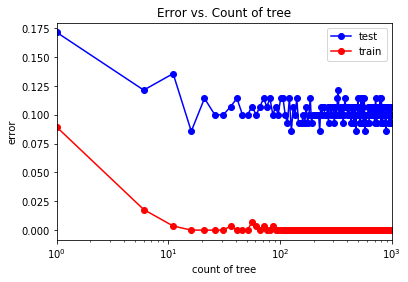

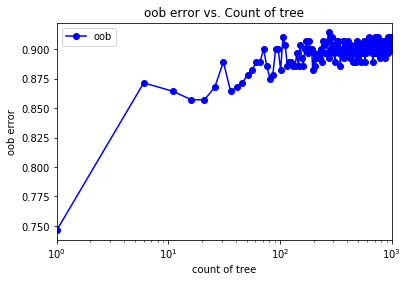

In [361]:
tree_arr = []
for i in range(1,1000,5):
    tree_arr.append(i)
test_err = []
train_err = []
oob_scores = []
for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree,oob_score=True,bootstrap=True,max_features = 6)
    rf.fit(X_train, Y_train)

    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(Y_train.values.ravel() != Y_train_pred))
    test_err.append(np.mean(Y_test.values.ravel() != Y_test_pred))
    oob_scores.append(rf.oob_score_) #Оценка качества модели
    
plt.figure(1)
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()

plt.figure(2)
plt.semilogx(tree_arr, oob_scores, 'b-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('oob error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('oob error')
plt.legend()
pass


<BR>Можно наблюдать, что мы имеем устойчивую ошибку около 0.1, т.е. вокруг неё все колеблется. Происходит постоянное переобучение. Прежде всего это связанно с недостаточностью данных для подкрепления тестовой выборки?. Минимальная ошибка в данном случае будет равняться 0.0857 c количеством деревьев 4</BR>

In [363]:
print('Количество деревьев ' + str(test_err.index(np.min(test_err)) + 1) + '\n',
      'Среднее значение ошибки ' + str(np.mean(test_err)) + '\n',
      'Минимальное значение ошибки ' + str(np.min(test_err)))

Количество деревьев 4
 Среднее значение ошибки 0.102857142857
 Минимальное значение ошибки 0.0857142857143


<BR><strong>Extremely Randomized Trees</strong></BR>

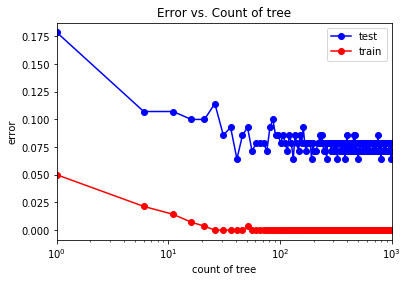

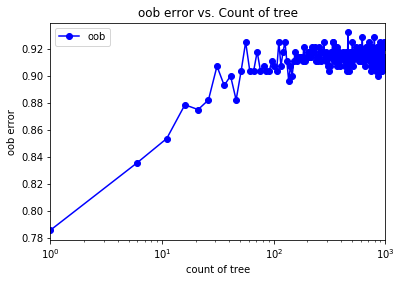

In [364]:
tree_arr = []
oob_scores = []
for i in range(1,1000,5):
    tree_arr.append(i)
test_err = []
train_err = []
for tree in tree_arr:
    rf = ensemble.ExtraTreesClassifier(n_estimators = tree,oob_score=True,bootstrap=True,max_features = 6)
    rf.fit(X_train, Y_train)

    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(Y_train.values.ravel() != Y_train_pred))
    test_err.append(np.mean(Y_test.values.ravel() != Y_test_pred))
    oob_scores.append(rf.oob_score_) #Оценка качества модели
    
plt.figure(1)
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()

plt.figure(2)
plt.semilogx(tree_arr, oob_scores, 'b-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('oob error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('oob error')
plt.legend()
pass

In [365]:
print('Количество деревьев ' + str(test_err.index(np.min(test_err)) + 1) + '\n',
      'Среднее значение ошибки ' + str(np.mean(test_err)) + '\n',
      'Минимальное значение ошибки ' + str(np.min(test_err)))

Количество деревьев 9
 Среднее значение ошибки 0.0769285714286
 Минимальное значение ошибки 0.0642857142857


<BR><strong>AdaBoost</strong></BR>

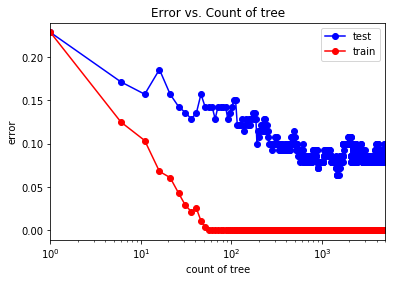

In [372]:
tree_arr = []
oob_scores = []
for i in range(1,5000,5):
    tree_arr.append(i)
test_err = []
train_err = []
for tree in tree_arr:
    rf = ensemble.AdaBoostClassifier(n_estimators = tree)
    rf.fit(X_train, Y_train)

    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(Y_train.values.ravel() != Y_train_pred))
    test_err.append(np.mean(Y_test.values.ravel() != Y_test_pred))   

plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

In [373]:
print('Количество деревьев ' + str(test_err.index(np.min(test_err)) + 1) + '\n',
      'Среднее значение ошибки ' + str(np.mean(test_err)) + '\n',
      'Минимальное значение ошибки ' + str(np.min(test_err)))

Количество деревьев 290
 Среднее значение ошибки 0.0893214285714
 Минимальное значение ошибки 0.0642857142857


<BR><strong>Gradient boosted trees</strong></BR>

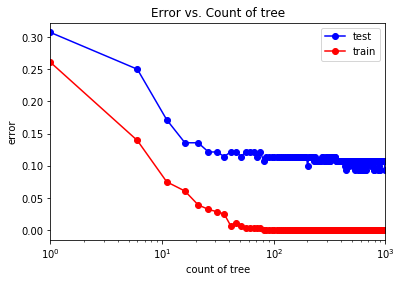

In [368]:
tree_arr = []
oob_scores = []
for i in range(1,1000,5):
    tree_arr.append(i)
test_err = []
train_err = []
for tree in tree_arr:
    rf = ensemble.GradientBoostingClassifier(n_estimators = tree)
    rf.fit(X_train, Y_train)

    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(Y_train.values.ravel() != Y_train_pred))
    test_err.append(np.mean(Y_test.values.ravel() != Y_test_pred))
    #oob_scores.append(rf.oob_score_) #Оценка качества модели
    
plt.figure(1)
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass


In [369]:
print('Количество деревьев ' + str(test_err.index(np.min(test_err)) + 1) + '\n',
      'Среднее значение ошибки ' + str(np.mean(test_err)) + '\n',
      'Минимальное значение ошибки ' + str(np.min(test_err)))

Количество деревьев 90
 Среднее значение ошибки 0.110285714286
 Минимальное значение ошибки 0.0928571428571


<BR>Многие методы показывают, что обладает переобучение в следствии чего ошибка постоянно колеблется. Как я и говорил, это может быть связанно с недостатком данных, а также их корреляцией. Наименьшую ошибку можно наблюдать на AdaBoost, она равняется 0.065 при 240 деревьях. В градиентном методе можно наблюдать удивительный факт, при увеличении числа деревьев, ошибка падает, но возрастает амплитуда колебания</BR>
